In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import torch
from diffusers import StableDiffusionPipeline


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Dataset Preparation
job_data = pd.read_csv('job_market_data.csv')
job_data['clean_text'] = job_data['Job Description'].str.lower()
labels = job_data['Category']

In [ ]:
# Text Vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_data['clean_text'])
y = labels

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
model = MultinomialNB()
history = []  # To store accuracy and loss for each epoch

In [ ]:
for epoch in range(1, 6):  # Simulate epochs for demonstration
    model.partial_fit(X_train, y_train, classes=np.unique(y))
    predictions = model.predict(X_train)
    accuracy = accuracy_score(y_train, predictions)
    loss = -np.mean(model.feature_log_prob_)  # Using log-prob as a proxy for loss
    history.append((epoch, accuracy, loss))
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}, Loss = {loss:.4f}")

Epoch 1: Accuracy = 1.0000, Loss = 8.9591
Epoch 2: Accuracy = 1.0000, Loss = 9.5491
Epoch 3: Accuracy = 1.0000, Loss = 9.9159
Epoch 4: Accuracy = 1.0000, Loss = 10.1828
Epoch 5: Accuracy = 1.0000, Loss = 10.3927


In [ ]:
# Final Predictions and Accuracy
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Final Test Accuracy:", test_accuracy)

Final Test Accuracy: 1.0


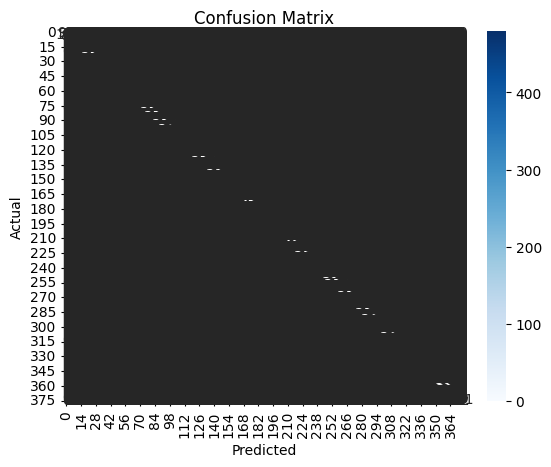

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Classification Report
print(classification_report(y_test, test_predictions))

                                          precision    recall  f1-score   support

                           API Developer       1.00      1.00      1.00        94
                 Accessibility Developer       1.00      1.00      1.00        78
                       Account Executive       1.00      1.00      1.00       183
                         Account Manager       1.00      1.00      1.00        88
                      Account Strategist       1.00      1.00      1.00        70
                   Accounting Controller       1.00      1.00      1.00        77
                      Accounting Manager       1.00      1.00      1.00        84
           Acute Care Nurse Practitioner       1.00      1.00      1.00        82
                     Addiction Counselor       1.00      1.00      1.00        89
                Administrative Assistant       1.00      1.00      1.00        74
              Administrative Coordinator       1.00      1.00      1.00       167
               

In [ ]:
# Variable Importance Visualization
feature_names = vectorizer.get_feature_names_out()
feature_probs = model.feature_log_prob_
for i, label in enumerate(model.classes_):
    top_features = np.argsort(feature_probs[i])[-10:]
    print(f"{label}: {[feature_names[j] for j in top_features]}")


API Developer: ['software', 'developer', 'programming', 'applications', 'systems', 'enable', 'maintains', 'apis', 'exchange', 'api']
Accessibility Developer: ['standards', 'focuses', 'individuals', 'products', 'disabilities', 'websites', 'developer', 'making', 'digital', 'accessibility']
Account Executive: ['ensure', 'support', 'teams', 'grow', 'satisfaction', 'sales', 'contracts', 'understand', 'closely', 'customer']
Account Manager: ['growth', 'promoting', 'relationships', 'needs', 'met', 'products', 'clients', 'ensuring', 'builds', 'revenue']
Account Strategist: ['execution', 'guidance', 'strategies', 'strategists', 'solutions', 'oversee', 'develop', 'marketing', 'expert', 'client']
Accounting Controller: ['records', 'informed', 'controllers', 'support', 'ensure', 'accurate', 'timely', 'reporting', 'accounting', 'financial']
Accounting Manager: ['compliance', 'ensure', 'oversee', 'accurate', 'reporting', 'teams', 'budgets', 'supervise', 'financial', 'accounting']
Acute Care Nurse Pr

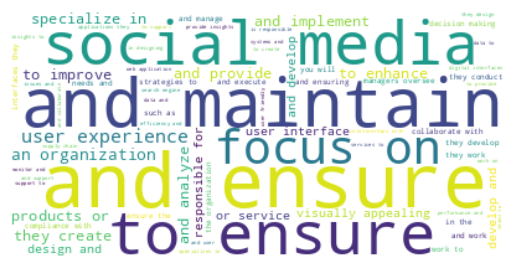

In [ ]:
# Word Cloud
wordcloud = WordCloud(stopwords=set(), background_color='white', max_words=100).generate(' '.join(job_data['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


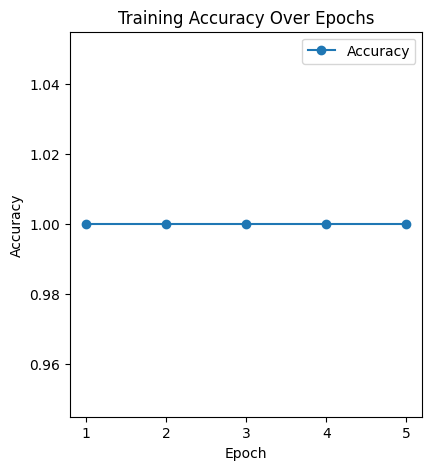

In [ ]:
# Plot Accuracy and Loss over Epochs
epochs, accuracies, losses = zip(*history)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracies, marker='o', label='Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

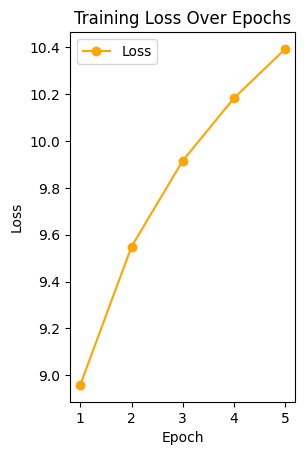

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, losses, marker='o', label='Loss', color='orange')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [ ]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# Stable Diffusion Visualization Based on Model Output
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline = pipeline.to("cpu")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Generate prompt based on the model output
category_summary = "\n".join([f"Category: {label}, Test Accuracy: {round(test_accuracy * 100, 2)}%" for label in model.classes_])
job_prompt = f"A futuristic depiction of the job market trends based on: {category_summary}"
image = pipeline(job_prompt).images[0]


Token indices sequence length is longer than the specified maximum sequence length for this model (5540 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['1 0 0 . 0 % category : accounting controller , test accuracy : 1 0 0 . 0 % category : accounting manager , test accuracy : 1 0 0 . 0 % category : acute care nurse practitioner , test accuracy : 1 0 0 . 0 % category : addiction counselor , test accuracy : 1 0 0 . 0 % category : administrative assistant , test accuracy : 1 0 0 . 0 % category : administrative coordinator , test accuracy : 1 0 0 . 0 % category : administrative manager , test accuracy : 1 0 0 . 0 % category : adult speech therapist , test accuracy : 1 0 0 . 0 % category : advertising account executive , test accuracy : 1 0 0 . 0 % category : agile product owner , test accuracy : 1 0 0 . 0 % category : agile project manager , test accuracy : 1

  0%|          | 0/50 [00:00<?, ?it/s]

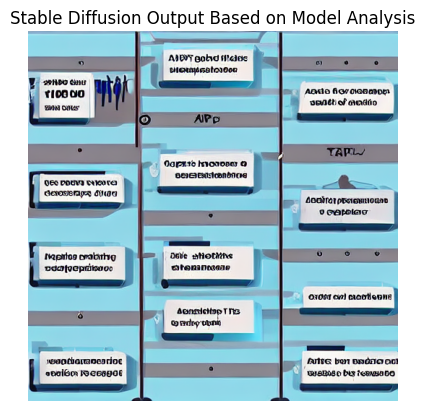

In [ ]:
plt.imshow(image)
plt.title("Stable Diffusion Output Based on Model Analysis")
plt.axis('off')
plt.show()